In [163]:
#import required packages
import fiona
import pandas as pd
import numpy as np
import geopandas as gpd
from shapely.geometry import Point
from pathlib import Path
import os
import numpy as np

In [164]:
indicator_name = 'Magic_bricks_city'

### Converting excel to point data file

In [165]:
# Reading file
file_path = r"C:\Users\chemi\Desktop\save_csv\magicbricks_updated.csv"
pointDf = pd.read_csv(file_path,header=0)
pointDf.head()

,unique_id,City,Rent_price,property_area_sqft,CoveredUnit,latitude,longitude,Post_date,Property_Name,Property_Address,url
0,65067887,Agra,5000000,1350,Sq-ft,27.217419,77.950218,11-01-2023,2BHK Multistorey Apartment for Rent in Sikandra,"Sikandra, Agra, Uttar Pradesh",https://www.magicbricks.com/propertyDetails/2-...
1,27488515,Agra,4500000,1450,Sq-ft,27.143372,78.043589,01-01-2023,2BHK Residential House for Rent in Agra Shamsh...,"Flat no 29, Agra Shamshabad Raja Kherah Marg, ...",https://www.magicbricks.com/propertyDetails/2-...
2,64395181,Agra,60000,225,Sq-ft,27.184056,78.004554,02-01-2023,6BHK Residential House for Rent in Nai Ki Mandi,"Nai Ki Mandi, Agra, Uttar Pradesh",https://www.magicbricks.com/propertyDetails/6-...
3,33106779,Agra,58000,3500,Sq-ft,27.201434,78.020326,09-12-2022,5BHK Builder Floor Apartment for Rent in Vijay...,"Vijay Nagar Colony, Agra, Uttar Pradesh",https://www.magicbricks.com/propertyDetails/5-...
4,54838709,Agra,50000,2765,Sq-ft,27.176670,78.008075,18-12-2022,4BHK Multistorey Apartment for Rent in Shanker...,"Taj Nagri, Agra, Uttar Pradesh",https://www.magicbricks.com/propertyDetails/4-...


In [170]:
pointDf[pointDf["Rent_price"]==pointDf["Rent_price"].max()]

,unique_id,City,Rent_price,property_area_sqft,CoveredUnit,latitude,longitude,Post_date,Property_Name,Property_Address,url
89086,55624637,Mysore,21500000,2400,Sq-ft,12.325134,76.631163,08-12-2022,7BHK Residential House for Rent in V V Mohalla,"V V Mohalla, Mysore, Karnataka",https://www.magicbricks.com/propertyDetails/7-...


In [167]:
pointDf.shape

(119898, 11)

In [39]:
# Checking data types of attributes
pointDf.dtypes

unique_id               int64
City                   object
Rent_price              int64
property_area_sqft      int64
CoveredUnit            object
latitude              float64
longitude             float64
Post_date              object
Property_Name          object
Property_Address       object
url                    object
dtype: object

In [40]:
len(pointDf['property_area_sqft'])

119898

In [41]:
# Snippet converts column data type to float format

pointDf['property_area_sqft'] = pointDf['property_area_sqft'].astype(str).str.replace(",", "").astype(float)
pointDf.dtypes

unique_id               int64
City                   object
Rent_price              int64
property_area_sqft    float64
CoveredUnit            object
latitude              float64
longitude             float64
Post_date              object
Property_Name          object
Property_Address       object
url                    object
dtype: object

In [10]:
# pointDf.to_csv(r'D:\Pdt_V2.0\vector\rental_data\priceCheck.csv')

In [42]:
# Creating & adding geometry column from lat, lon attributes

# Ref - https://stdworkflow.com/1615/python-geopandas-text-latitude-and-longitude-converted-to-point-features-line-features

geometry = [Point(xy) for xy in zip(pointDf.longitude, pointDf.latitude)]
gdf = gpd.GeoDataFrame(pointDf, crs="EPSG:4326", geometry = geometry)
gdf

,unique_id,City,Rent_price,property_area_sqft,CoveredUnit,latitude,longitude,Post_date,Property_Name,Property_Address,url,geometry
0,65067887,Agra,5000000,1350.0,Sq-ft,27.217419,77.950218,11-01-2023,2BHK Multistorey Apartment for Rent in Sikandra,"Sikandra, Agra, Uttar Pradesh",https://www.magicbricks.com/propertyDetails/2-...,POINT (77.95022 27.21742)
1,27488515,Agra,4500000,1450.0,Sq-ft,27.143372,78.043589,01-01-2023,2BHK Residential House for Rent in Agra Shamsh...,"Flat no 29, Agra Shamshabad Raja Kherah Marg, ...",https://www.magicbricks.com/propertyDetails/2-...,POINT (78.04359 27.14337)
2,64395181,Agra,60000,225.0,Sq-ft,27.184056,78.004554,02-01-2023,6BHK Residential House for Rent in Nai Ki Mandi,"Nai Ki Mandi, Agra, Uttar Pradesh",https://www.magicbricks.com/propertyDetails/6-...,POINT (78.00455 27.18406)
3,33106779,Agra,58000,3500.0,Sq-ft,27.201434,78.020326,09-12-2022,5BHK Builder Floor Apartment for Rent in Vijay...,"Vijay Nagar Colony, Agra, Uttar Pradesh",https://www.magicbricks.com/propertyDetails/5-...,POINT (78.02033 27.20143)
4,54838709,Agra,50000,2765.0,Sq-ft,27.176670,78.008075,18-12-2022,4BHK Multistorey Apartment for Rent in Shanker...,"Taj Nagri, Agra, Uttar Pradesh",https://www.magicbricks.com/propertyDetails/4-...,POINT (78.00807 27.17667)
...,...,...,...,...,...,...,...,...,...,...,...,...
119893,64238763,Warangal,5000,650.0,Sq-ft,17.985301,79.626415,19-11-2022,1BHK Residential House for Rent in Enumamula,"Balaji Nagar, Enumamula, Warangal, Andhra Pradesh",https://www.magicbricks.com/propertyDetails/1-...,POINT (79.62642 17.98530)
119894,63201363,Warangal,5000,750.0,Sq-ft,18.009979,79.551341,07-12-2022,1BHK Residential House for Rent in Hanamkonda,"Hanamkonda, Warangal, Andhra Pradesh",https://www.magicbricks.com/propertyDetails/1-...,POINT (79.55134 18.00998)
119895,63164889,Warangal,4500,450.0,Sq-ft,17.972362,79.620882,28-11-2022,1BHK Residential House for Rent in Abbanikunta,"Abbanikunta, Warangal, Andhra Pradesh",https://www.magicbricks.com/propertyDetails/1-...,POINT (79.62088 17.97236)
119896,48954757,Warangal,4200,400.0,Sq-ft,18.009979,79.551341,09-12-2022,1BHK Builder Floor Apartment for Rent in Hanam...,"Hanamkonda, Warangal, Andhra Pradesh",https://www.magicbricks.com/propertyDetails/1-...,POINT (79.55134 18.00998)


In [43]:
os.getcwd()
os.chdir(r"C:\Users\chemi\Desktop\save_csv\magic_bricks_shapefile")
print(os.getcwd())

C:\Users\chemi\Desktop\save_csv\magic_bricks_shapefile


In [44]:
# Saving file

# output_path = r'D:\Pdt_V2\vector\rental_data\Rental_Cleaned' + '/' + Path(file_path).stem + '_shp/'

# if not os.path.exists(output_path):
#     os.makedirs(output_path)
#gdf_data = gdf.set_geometry('geometry')
gdf.to_file(filename = Path(file_path).stem + '.shp', driver = "ESRI Shapefile")

C:\Users\chemi\AppData\Local\Temp\ipykernel_28436\1055054411.py:8: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf.to_file(filename = Path(file_path).stem + '.shp', driver = "ESRI Shapefile")


### Clipping to AOI extent

In [45]:
# Reading input file whose extent is to be taken 

aoi_file_path = r'C:\Users\chemi\Downloads\Top104_Cities_1\Top104_Cities\Top104GrwthCentre5Km_buff.shp'
aoi_file = gpd.read_file(aoi_file_path)
aoi_file

,IS_TC,T_NAME,POPULATION,INCOME,CVC_STATUS,buf_mtr,AreaKm,POP,geometry
0,IND001010800013,Srinagar,1360000,127000000000,M Corp OG,5000.0,925.726078,1360000,"POLYGON ((74.63503 34.08849, 74.63454 34.08894..."
1,IND001021800071,Jammu,638000,82500000000,M Corp OG,5000.0,397.663516,638000,"POLYGON ((74.74326 32.76253, 74.74324 32.76319..."
2,IND003037800166,Jalandhar,949000,241000000000,M Corp OG,5000.0,480.714954,949000,"POLYGON ((75.45235 31.40772, 75.45232 31.40789..."
3,IND003041800196,Ludhiana,1730000,451000000000,M Corp,5000.0,656.216409,1730000,"POLYGON ((75.69059 30.90533, 75.69064 30.90777..."
4,IND003048800242,Patiala,515000,163000000000,M Corp OG,5000.0,281.145624,515000,"POLYGON ((76.32139 30.29901, 76.31995 30.29959..."
...,...,...,...,...,...,...,...,...,...
99,IND023439802273,Indore,2110000,267000000000,M Corp OG,0.0,691.252293,2110000,"POLYGON ((75.95222 22.72561, 75.95181 22.72342..."
100,IND032591803267,Kozhikode,581000,105000000000,M Corp OG,0.0,514.560681,581000,"POLYGON ((75.84546 11.07421, 75.84527 11.07485..."
101,IND032592803269,Malappuram,119000\r\n119000\r\n119000\r\n119000,15000000000,M OG,0.0,547.575254,119000,"POLYGON ((76.03463 10.94457, 76.03539 10.94690..."
102,IND024492802629,Surat,5030000,1590000000000,M Corp OG,0.0,688.801020,5030000,"POLYGON ((72.83620 21.09858, 72.83425 21.09827..."


In [46]:
# File to be clipped
input_file_path = Path(file_path).stem + '.shp' 
#input_file = gpd.read_file(input_file_path)
input_file=gdf
input_file

,unique_id,City,Rent_price,property_area_sqft,CoveredUnit,latitude,longitude,Post_date,Property_Name,Property_Address,url,geometry
0,65067887,Agra,5000000,1350.0,Sq-ft,27.217419,77.950218,11-01-2023,2BHK Multistorey Apartment for Rent in Sikandra,"Sikandra, Agra, Uttar Pradesh",https://www.magicbricks.com/propertyDetails/2-...,POINT (77.95022 27.21742)
1,27488515,Agra,4500000,1450.0,Sq-ft,27.143372,78.043589,01-01-2023,2BHK Residential House for Rent in Agra Shamsh...,"Flat no 29, Agra Shamshabad Raja Kherah Marg, ...",https://www.magicbricks.com/propertyDetails/2-...,POINT (78.04359 27.14337)
2,64395181,Agra,60000,225.0,Sq-ft,27.184056,78.004554,02-01-2023,6BHK Residential House for Rent in Nai Ki Mandi,"Nai Ki Mandi, Agra, Uttar Pradesh",https://www.magicbricks.com/propertyDetails/6-...,POINT (78.00455 27.18406)
3,33106779,Agra,58000,3500.0,Sq-ft,27.201434,78.020326,09-12-2022,5BHK Builder Floor Apartment for Rent in Vijay...,"Vijay Nagar Colony, Agra, Uttar Pradesh",https://www.magicbricks.com/propertyDetails/5-...,POINT (78.02033 27.20143)
4,54838709,Agra,50000,2765.0,Sq-ft,27.176670,78.008075,18-12-2022,4BHK Multistorey Apartment for Rent in Shanker...,"Taj Nagri, Agra, Uttar Pradesh",https://www.magicbricks.com/propertyDetails/4-...,POINT (78.00807 27.17667)
...,...,...,...,...,...,...,...,...,...,...,...,...
119893,64238763,Warangal,5000,650.0,Sq-ft,17.985301,79.626415,19-11-2022,1BHK Residential House for Rent in Enumamula,"Balaji Nagar, Enumamula, Warangal, Andhra Pradesh",https://www.magicbricks.com/propertyDetails/1-...,POINT (79.62642 17.98530)
119894,63201363,Warangal,5000,750.0,Sq-ft,18.009979,79.551341,07-12-2022,1BHK Residential House for Rent in Hanamkonda,"Hanamkonda, Warangal, Andhra Pradesh",https://www.magicbricks.com/propertyDetails/1-...,POINT (79.55134 18.00998)
119895,63164889,Warangal,4500,450.0,Sq-ft,17.972362,79.620882,28-11-2022,1BHK Residential House for Rent in Abbanikunta,"Abbanikunta, Warangal, Andhra Pradesh",https://www.magicbricks.com/propertyDetails/1-...,POINT (79.62088 17.97236)
119896,48954757,Warangal,4200,400.0,Sq-ft,18.009979,79.551341,09-12-2022,1BHK Builder Floor Apartment for Rent in Hanam...,"Hanamkonda, Warangal, Andhra Pradesh",https://www.magicbricks.com/propertyDetails/1-...,POINT (79.55134 18.00998)


In [47]:
# Clipping function
clip_file = gpd.clip(input_file, aoi_file)
clip_file

C:\Users\chemi\AppData\Local\Temp\ipykernel_28436\4223827031.py:2: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:4326
Right CRS: GEOGCRS["WGS 84",DATUM["World Geodetic System 1984 ...

  clip_file = gpd.clip(input_file, aoi_file)


,unique_id,City,Rent_price,property_area_sqft,CoveredUnit,latitude,longitude,Post_date,Property_Name,Property_Address,url,geometry
84139,64663247,Madurai,8000,1200.0,Sq-ft,9.837043,78.033770,15-12-2022,2BHK Residential House for Rent in Kappalur,"Koothiyarkundu Bus stop, Kappalur, Madurai, Ta...",https://www.magicbricks.com/propertyDetails/2-...,POINT (78.03377 9.83704)
84197,51395862,Madurai,7000,850.0,Sq-ft,9.849076,78.096569,07-11-2022,2BHK Residential House for Rent in perunkudi,"2/549 A, Ground floor, vasuki nagar. 625022, p...",https://www.magicbricks.com/propertyDetails/2-...,POINT (78.09657 9.84908)
84121,65006083,Madurai,8500,1100.0,Sq-ft,9.849076,78.096569,14-01-2023,2BHK Residential House for Rent in perunkudi,"Vasuki nagar, sourashtra colony near, perungud...",https://www.magicbricks.com/propertyDetails/2-...,POINT (78.09657 9.84908)
84209,62900277,Madurai,6500,900.0,Sq-ft,9.849076,78.096569,19-11-2022,2BHK Residential House for Rent in perunkudi,"2549A, Vasuki street, SNC post, Perungudi, per...",https://www.magicbricks.com/propertyDetails/2-...,POINT (78.09657 9.84908)
84236,64748251,Madurai,5500,800.0,Sq-ft,9.849076,78.096569,21-12-2022,1BHK Residential House for Rent in perunkudi,"2868, Watts Nagar 1st street, Opposite to EB O...",https://www.magicbricks.com/propertyDetails/1-...,POINT (78.09657 9.84908)
...,...,...,...,...,...,...,...,...,...,...,...,...
1049,64199771,Ahmedabad,18500,900.0,Sq-ft,23.147055,72.537620,17-11-2022,2BHK Multistorey Apartment for Rent in komal e...,"Khodiyar, Ahmedabad - West, Gujarat",https://www.magicbricks.com/propertyDetails/2-...,POINT (72.53762 23.14706)
1388,63212173,Ahmedabad,14000,680.0,Sq-ft,23.147055,72.537620,18-12-2022,2BHK Multistorey Apartment for Rent in keshar ...,"Khodiyar, Ahmedabad - West, Gujarat",https://www.magicbricks.com/propertyDetails/2-...,POINT (72.53762 23.14706)
1746,55600419,Ahmedabad,7500,120.0,Sq-ft,23.101817,72.525207,03-11-2022,2BHK Multistorey Apartment for Rent in Vasant ...,"vir savarkar heights 1, Vasant Nagar, Ahmedaba...",https://www.magicbricks.com/propertyDetails/2-...,POINT (72.52521 23.10182)
661,36511491,Ahmedabad,30000,1440.0,Sq-ft,23.109796,72.514157,22-11-2022,4BHK Residential House for Rent in Ognaj,"C -26, Gujarat high court co.operative society...",https://www.magicbricks.com/propertyDetails/4-...,POINT (72.51416 23.10980)


In [48]:
clip_file.dtypes

unique_id                int64
City                    object
Rent_price               int64
property_area_sqft     float64
CoveredUnit             object
latitude               float64
longitude              float64
Post_date               object
Property_Name           object
Property_Address        object
url                     object
geometry              geometry
dtype: object

In [25]:
clip_out_path = r'C:\Users\chemi\Desktop\save_csv' + '/' + Path(input_file_path).stem + '_clip'

if not os.path.exists(clip_out_path):
    os.makedirs(clip_out_path)

clip_file.to_file(filename = clip_out_path +  '/' + Path(input_file_path).stem + '_' + Path(aoi_file_path).stem + \
                  '.shp', driver = "ESRI Shapefile")

C:\Users\chemi\AppData\Local\Temp\ipykernel_28436\3266201177.py:6: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  clip_file.to_file(filename = clip_out_path +  '/' + Path(input_file_path).stem + '_' + Path(aoi_file_path).stem + \


### Calculating Price per sqft

In [49]:
df = clip_file.copy()
df['Price_per_sqft'] = df['Rent_price']/df['property_area_sqft']
df

,unique_id,City,Rent_price,property_area_sqft,CoveredUnit,latitude,longitude,Post_date,Property_Name,Property_Address,url,geometry,Price_per_sqft
84139,64663247,Madurai,8000,1200.0,Sq-ft,9.837043,78.033770,15-12-2022,2BHK Residential House for Rent in Kappalur,"Koothiyarkundu Bus stop, Kappalur, Madurai, Ta...",https://www.magicbricks.com/propertyDetails/2-...,POINT (78.03377 9.83704),6.666667
84197,51395862,Madurai,7000,850.0,Sq-ft,9.849076,78.096569,07-11-2022,2BHK Residential House for Rent in perunkudi,"2/549 A, Ground floor, vasuki nagar. 625022, p...",https://www.magicbricks.com/propertyDetails/2-...,POINT (78.09657 9.84908),8.235294
84121,65006083,Madurai,8500,1100.0,Sq-ft,9.849076,78.096569,14-01-2023,2BHK Residential House for Rent in perunkudi,"Vasuki nagar, sourashtra colony near, perungud...",https://www.magicbricks.com/propertyDetails/2-...,POINT (78.09657 9.84908),7.727273
84209,62900277,Madurai,6500,900.0,Sq-ft,9.849076,78.096569,19-11-2022,2BHK Residential House for Rent in perunkudi,"2549A, Vasuki street, SNC post, Perungudi, per...",https://www.magicbricks.com/propertyDetails/2-...,POINT (78.09657 9.84908),7.222222
84236,64748251,Madurai,5500,800.0,Sq-ft,9.849076,78.096569,21-12-2022,1BHK Residential House for Rent in perunkudi,"2868, Watts Nagar 1st street, Opposite to EB O...",https://www.magicbricks.com/propertyDetails/1-...,POINT (78.09657 9.84908),6.875000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1049,64199771,Ahmedabad,18500,900.0,Sq-ft,23.147055,72.537620,17-11-2022,2BHK Multistorey Apartment for Rent in komal e...,"Khodiyar, Ahmedabad - West, Gujarat",https://www.magicbricks.com/propertyDetails/2-...,POINT (72.53762 23.14706),20.555556
1388,63212173,Ahmedabad,14000,680.0,Sq-ft,23.147055,72.537620,18-12-2022,2BHK Multistorey Apartment for Rent in keshar ...,"Khodiyar, Ahmedabad - West, Gujarat",https://www.magicbricks.com/propertyDetails/2-...,POINT (72.53762 23.14706),20.588235
1746,55600419,Ahmedabad,7500,120.0,Sq-ft,23.101817,72.525207,03-11-2022,2BHK Multistorey Apartment for Rent in Vasant ...,"vir savarkar heights 1, Vasant Nagar, Ahmedaba...",https://www.magicbricks.com/propertyDetails/2-...,POINT (72.52521 23.10182),62.500000
661,36511491,Ahmedabad,30000,1440.0,Sq-ft,23.109796,72.514157,22-11-2022,4BHK Residential House for Rent in Ognaj,"C -26, Gujarat high court co.operative society...",https://www.magicbricks.com/propertyDetails/4-...,POINT (72.51416 23.10980),20.833333


### Aggregating data at AOI level 

In [50]:
# The columns to be summed over  

price_column = 'Price_per_sqft' 

In [51]:
raw_file = df[['Rent_price', 'property_area_sqft', price_column, 'geometry']]
raw_file

,Rent_price,property_area_sqft,Price_per_sqft,geometry
84139,8000,1200.0,6.666667,POINT (78.03377 9.83704)
84197,7000,850.0,8.235294,POINT (78.09657 9.84908)
84121,8500,1100.0,7.727273,POINT (78.09657 9.84908)
84209,6500,900.0,7.222222,POINT (78.09657 9.84908)
84236,5500,800.0,6.875000,POINT (78.09657 9.84908)
...,...,...,...,...
1049,18500,900.0,20.555556,POINT (72.53762 23.14706)
1388,14000,680.0,20.588235,POINT (72.53762 23.14706)
1746,7500,120.0,62.500000,POINT (72.52521 23.10182)
661,30000,1440.0,20.833333,POINT (72.51416 23.10980)


In [53]:
agg_out_path = r'C:\Users\chemi\Desktop\save_csv' + '/' + indicator_name + '/AveragePriceSqft/' 

if not os.path.exists(agg_out_path):
    os.makedirs(agg_out_path)

In [54]:
# File with raw data
#sjoin -spatial join

data_join_csv = gpd.sjoin(aoi_file, raw_file, how="left", op='intersects').drop(['index_right'], axis=1)
data_join_csv = data_join_csv.drop(['geometry'], axis = 1)

data_join_csv.to_csv(agg_out_path +  '/' + Path(input_file_path).stem + '_' + Path(aoi_file_path).stem + '_raw.csv',index=False)

data_join_csv.iloc[30:50,:]

C:\Users\chemi\Desktop\enviroments\myml\lib\site-packages\IPython\core\interactiveshell.py:3318: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):
C:\Users\chemi\AppData\Local\Temp\ipykernel_28436\4057625994.py:4: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: GEOGCRS["WGS 84",DATUM["World Geodetic System 1984 ...
Right CRS: EPSG:4326

  data_join_csv = gpd.sjoin(aoi_file, raw_file, how="left", op='intersects').drop(['index_right'], axis=1)


,IS_TC,T_NAME,POPULATION,INCOME,CVC_STATUS,buf_mtr,AreaKm,POP,Rent_price,property_area_sqft,Price_per_sqft
1,IND001021800071,Jammu,638000,82500000000,M Corp OG,5000.0,397.663516,638000,80000.0,2500.0,32.000000
1,IND001021800071,Jammu,638000,82500000000,M Corp OG,5000.0,397.663516,638000,50000.0,3230.0,15.479876
1,IND001021800071,Jammu,638000,82500000000,M Corp OG,5000.0,397.663516,638000,52000.0,2000.0,26.000000
1,IND001021800071,Jammu,638000,82500000000,M Corp OG,5000.0,397.663516,638000,8700.0,1500.0,5.800000
1,IND001021800071,Jammu,638000,82500000000,M Corp OG,5000.0,397.663516,638000,6500.0,1000.0,6.500000
1,IND001021800071,Jammu,638000,82500000000,M Corp OG,5000.0,397.663516,638000,12000.0,1000.0,12.000000
1,IND001021800071,Jammu,638000,82500000000,M Corp OG,5000.0,397.663516,638000,6000.0,800.0,7.500000
1,IND001021800071,Jammu,638000,82500000000,M Corp OG,5000.0,397.663516,638000,12500.0,1500.0,8.333333
1,IND001021800071,Jammu,638000,82500000000,M Corp OG,5000.0,397.663516,638000,11000.0,1361.0,8.082292
1,IND001021800071,Jammu,638000,82500000000,M Corp OG,5000.0,397.663516,638000,20000.0,450.0,44.444444


In [ ]:
# The End

### Agrregate City level file

In [196]:
df=pd.read_csv(r"C:\Users\chemi\Desktop\save_csv\output files\Magic_bricks_city\AveragePriceSqft\magicbricks_city_per_sqft_price.csv",low_memory=False)


In [197]:
df

,IS_TC,T_NAME,POPULATION,INCOME,CVC_STATUS,buf_mtr,AreaKm,POP,Rent_price,property_area_sqft,Price_per_sqft
0,IND001010800013,Srinagar,1360000,1.270000e+11,M Corp OG,5000,925.726078,1360000,NaN,NaN,NaN
1,IND001021800071,Jammu,638000,8.250000e+10,M Corp OG,5000,397.663516,638000,10000.0,900.0,11.111111
2,IND001021800071,Jammu,638000,8.250000e+10,M Corp OG,5000,397.663516,638000,7000.0,1400.0,5.000000
3,IND001021800071,Jammu,638000,8.250000e+10,M Corp OG,5000,397.663516,638000,12000.0,2000.0,6.000000
4,IND001021800071,Jammu,638000,8.250000e+10,M Corp OG,5000,397.663516,638000,23000.0,5400.0,4.259259
...,...,...,...,...,...,...,...,...,...,...,...
111518,IND024476802501,Rajkot,1450000,3.280000e+11,M Corp OG,0,511.153617,1450000,16000.0,650.0,24.615385
111519,IND024476802501,Rajkot,1450000,3.280000e+11,M Corp OG,0,511.153617,1450000,8000.0,900.0,8.888889
111520,IND024476802501,Rajkot,1450000,3.280000e+11,M Corp OG,0,511.153617,1450000,5000.0,355.0,14.084507
111521,IND024476802501,Rajkot,1450000,3.280000e+11,M Corp OG,0,511.153617,1450000,7000.0,540.0,12.962963


In [198]:
df1=df[["IS_TC","T_NAME","Rent_price","property_area_sqft"]]

In [199]:
df2=df1.groupby("IS_TC").agg({'T_NAME':'first', 'Rent_price': lambda x : x.sum(skipna=False), 'property_area_sqft':lambda x : x.sum(skipna=False), \
        }).rename(columns={"property_area_sqft":"Total_area_sqft", \
         "Rent_price":"Total_Rent_price", 'Price_per_sqft':'Total_Price_per_sqft'  })

In [200]:
df2

,T_NAME,Total_Rent_price,Total_area_sqft
IS_TC,,,
IND001010800013,Srinagar,NaN,NaN
IND001021800071,Jammu,1169700.0,67841.0
IND003037800166,Jalandhar,598600.0,58589.0
IND003041800196,Ludhiana,3574498.0,224070.0
IND003048800242,Patiala,427250.0,42734.0
...,...,...,...
IND033623803754,Madurai,18535050.0,515739.0
IND033628803860,Tirunelveli,2012500.0,121590.0
IND033632803984,Coimbatore,24200661.0,1606096.0


In [201]:
df2["Average_per_sqft"]=df2["Total_Rent_price"]/df2["Total_area_sqft"]

In [202]:
df2

,T_NAME,Total_Rent_price,Total_area_sqft,Average_per_sqft
IS_TC,,,,
IND001010800013,Srinagar,NaN,NaN,NaN
IND001021800071,Jammu,1169700.0,67841.0,17.241786
IND003037800166,Jalandhar,598600.0,58589.0,10.216935
IND003041800196,Ludhiana,3574498.0,224070.0,15.952595
IND003048800242,Patiala,427250.0,42734.0,9.997894
...,...,...,...,...
IND033623803754,Madurai,18535050.0,515739.0,35.938818
IND033628803860,Tirunelveli,2012500.0,121590.0,16.551526
IND033632803984,Coimbatore,24200661.0,1606096.0,15.068004


In [203]:
df2.to_csv(r"C:\Users\chemi\Desktop\save_csv\output files\Magic_bricks_city\AveragePriceSqft\Magicbrick_City_average_per_sqft.csv")

### Agrregate hexgrid file

In [60]:
hexg=pd.read_csv(r"C:\Users\chemi\Desktop\save_csv\output files\Magic_bricks_hexgrid_per_square_feet\AveragePriceSqft\magicbricks_hexgrid08_Average_per_sqft.csv",low_memory=False)


In [133]:
hexg

,HEXID08,POSTCODE,IS_TC,T_NAME,IS_SDC,IS_DC,SD_NAME,D_NAME,S_NAME,IS_SC,GEOHASH,Rent_price,property_area_sqft,Price_per_sqft
0,883d34ac97fffff,192121,IND001010800013,Srinagar,IND00100200008,IND001002,Chadoora,Badgam,Jammu & Kashmir,IND001,twj1pz1s41ru,NaN,NaN,NaN
1,883d34a63dfffff,191131,IND001010800013,Srinagar,IND00101100047,IND001011,Ganderbal,Ganderbal,Jammu & Kashmir,IND001,twj4m145wspp,NaN,NaN,NaN
2,883d34a483fffff,190003,IND001010800013,Srinagar,IND00101000044,IND001010,Srinagar (South),Srinagar,Jammu & Kashmir,IND001,twj4psp3u3tp,NaN,NaN,NaN
3,883d35d317fffff,190006,IND001010800013,Srinagar,IND00101100047,IND001011,Ganderbal,Ganderbal,Jammu & Kashmir,IND001,twj62yt9mp62,NaN,NaN,NaN
4,883d35d31dfffff,190006,IND001010800013,Srinagar,IND00101100047,IND001011,Ganderbal,Ganderbal,Jammu & Kashmir,IND001,twj62x9m1tfv,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182920,8860a25885fffff,500031,IND036536802918,Hyderabad,IND03653704543,IND036537,Shamshabad,Rangareddy,Telangana,IND036,tepdzqn2q3bu,10000.0,1200.0,8.333333
182921,8860a25885fffff,500031,IND036536802918,Hyderabad,IND03653704543,IND036537,Shamshabad,Rangareddy,Telangana,IND036,tepdzqn2q3bu,9000.0,125.0,72.000000
182922,8860a25885fffff,500031,IND036536802918,Hyderabad,IND03653704543,IND036537,Shamshabad,Rangareddy,Telangana,IND036,tepdzqn2q3bu,15000.0,1000.0,15.000000
182923,8860b52f31fffff,500088,IND036536802918,Hyderabad,IND03653704543,IND036537,Shamshabad,Rangareddy,Telangana,IND036,tepgm1tdkt8q,NaN,NaN,NaN


In [175]:
hexg1=hexg.groupby("HEXID08").agg({"IS_TC":"first","T_NAME":"first","Rent_price":lambda x :x.sum(skipna=False), "property_area_sqft":lambda x :x.sum(skipna=False)})

In [176]:
hexg1

,IS_TC,T_NAME,Rent_price,property_area_sqft
HEXID08,,,,
88209b6821fffff,IND001010800013,Srinagar,NaN,NaN
88209b6823fffff,IND001010800013,Srinagar,NaN,NaN
88209b6825fffff,IND001010800013,Srinagar,NaN,NaN
88209b6827fffff,IND001010800013,Srinagar,NaN,NaN
88209b6829fffff,IND001010800013,Srinagar,NaN,NaN
...,...,...,...,...
88619bd365fffff,IND028547802969,Vijayawada,282500.0,24694.0
88619bd367fffff,IND028547802969,Vijayawada,NaN,NaN
88619bd369fffff,IND028547802969,Vijayawada,NaN,NaN


In [177]:
hexg1["Average_hexgrid_rent_price"]=hexg1["Rent_price"]/hexg1["property_area_sqft"]

In [178]:
hexg1

,IS_TC,T_NAME,Rent_price,property_area_sqft,Average_hexgrid_rent_price
HEXID08,,,,,
88209b6821fffff,IND001010800013,Srinagar,NaN,NaN,NaN
88209b6823fffff,IND001010800013,Srinagar,NaN,NaN,NaN
88209b6825fffff,IND001010800013,Srinagar,NaN,NaN,NaN
88209b6827fffff,IND001010800013,Srinagar,NaN,NaN,NaN
88209b6829fffff,IND001010800013,Srinagar,NaN,NaN,NaN
...,...,...,...,...,...
88619bd365fffff,IND028547802969,Vijayawada,282500.0,24694.0,11.440026
88619bd367fffff,IND028547802969,Vijayawada,NaN,NaN,NaN
88619bd369fffff,IND028547802969,Vijayawada,NaN,NaN,NaN


In [179]:
hexg1.to_csv(r"C:\Users\chemi\Desktop\save_csv\output files\Magic_bricks_hexgrid_per_square_feet\AveragePriceSqft\magicbricks_sumrize_hexgrid08_Rent_price.csv")

In [206]:
hexg1.reset_index(inplace=True)
df2.reset_index(inplace=True)

In [207]:
hex_df=pd.merge(hexg1,df2[["IS_TC","Average_per_sqft"]],on='IS_TC')

In [208]:
hex_df

,HEXID08,IS_TC,T_NAME,Rent_price,property_area_sqft,Average_hexgrid_rent_price,Average_per_sqft
0,88209b6821fffff,IND001010800013,Srinagar,NaN,NaN,NaN,NaN
1,88209b6823fffff,IND001010800013,Srinagar,NaN,NaN,NaN,NaN
2,88209b6825fffff,IND001010800013,Srinagar,NaN,NaN,NaN,NaN
3,88209b6827fffff,IND001010800013,Srinagar,NaN,NaN,NaN,NaN
4,88209b6829fffff,IND001010800013,Srinagar,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
79738,88619bd365fffff,IND028547802969,Vijayawada,282500.0,24694.0,11.440026,26.567748
79739,88619bd367fffff,IND028547802969,Vijayawada,NaN,NaN,NaN,26.567748
79740,88619bd369fffff,IND028547802969,Vijayawada,NaN,NaN,NaN,26.567748
79741,88619bd36bfffff,IND028547802969,Vijayawada,NaN,NaN,NaN,26.567748


In [210]:
hex_df["Price_relative_to_city"]=hex_df["Average_hexgrid_rent_price"]/hex_df["Average_per_sqft"]

In [211]:
hex_df

,HEXID08,IS_TC,T_NAME,Rent_price,property_area_sqft,Average_hexgrid_rent_price,Average_per_sqft,Price_relative_to_city
0,88209b6821fffff,IND001010800013,Srinagar,NaN,NaN,NaN,NaN,NaN
1,88209b6823fffff,IND001010800013,Srinagar,NaN,NaN,NaN,NaN,NaN
2,88209b6825fffff,IND001010800013,Srinagar,NaN,NaN,NaN,NaN,NaN
3,88209b6827fffff,IND001010800013,Srinagar,NaN,NaN,NaN,NaN,NaN
4,88209b6829fffff,IND001010800013,Srinagar,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
79738,88619bd365fffff,IND028547802969,Vijayawada,282500.0,24694.0,11.440026,26.567748,0.430598
79739,88619bd367fffff,IND028547802969,Vijayawada,NaN,NaN,NaN,26.567748,NaN
79740,88619bd369fffff,IND028547802969,Vijayawada,NaN,NaN,NaN,26.567748,NaN
79741,88619bd36bfffff,IND028547802969,Vijayawada,NaN,NaN,NaN,26.567748,NaN


In [212]:
hex_df.to_csv(r"C:\Users\chemi\Desktop\save_csv\output files\Magic_bricks_hexgrid_per_square_feet\AveragePriceSqft\magicbricks_hexgrid08_price_relative_city.csv")

In [213]:
import seaborn as sns
import matplotlib.pyplot as plt

In [216]:
hex_df[hex_df["Price_relative_to_city"]==hex_df["Price_relative_to_city"].max()]

,HEXID08,IS_TC,T_NAME,Rent_price,property_area_sqft,Average_hexgrid_rent_price,Average_per_sqft,Price_relative_to_city
13231,883ce1cdb9fffff,IND018322801627,Guwahati,4680000.0,2290.0,2043.668122,21.182517,96.479004


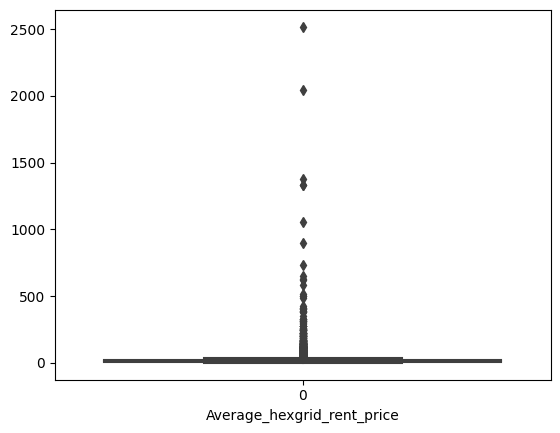

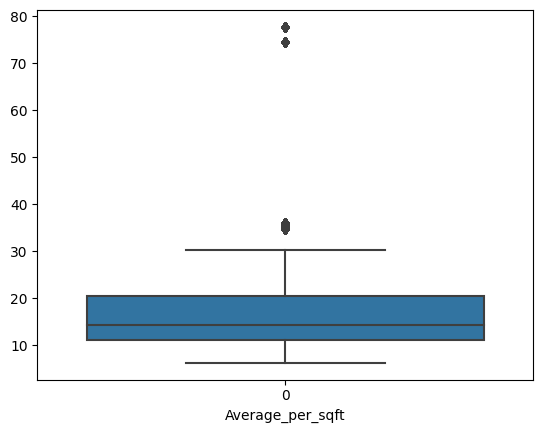

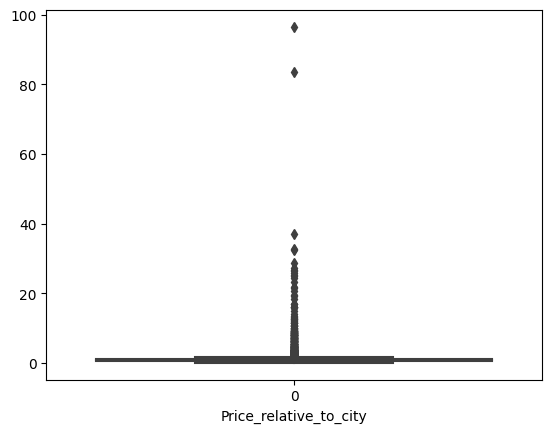

In [218]:
import seaborn as sns
import matplotlib.pyplot as plt
z=["Average_hexgrid_rent_price","Average_per_sqft","Price_relative_to_city"]
for i in z:
    plt.figure()
    sns.boxplot(hex_df[i])
    plt.xlabel(i)
    